In [4]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [5]:
# Step 2: Load the Dataset
df = pd.read_csv('Churn_Modelling.csv')

# Display the first 5 rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Step 3: Data Preprocessing


print(df.isnull().sum())

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)


X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target (Churn)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Training set shape: (8000, 11)
Testing set shape: (2000, 11)


<ipython-input-7-46ab73b62137>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='Set2')


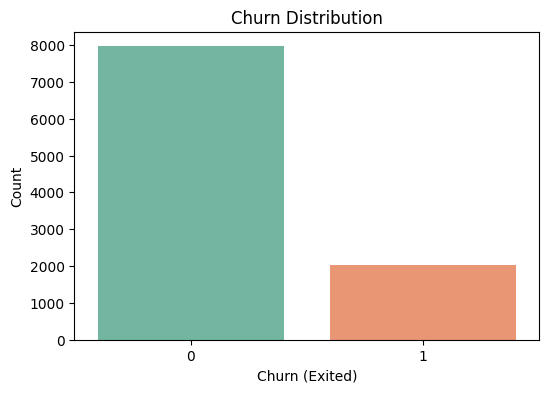

In [7]:
# Step 4: Exploratory Data Analysis (EDA)

plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn (Exited)')
plt.ylabel('Count')
plt.show()



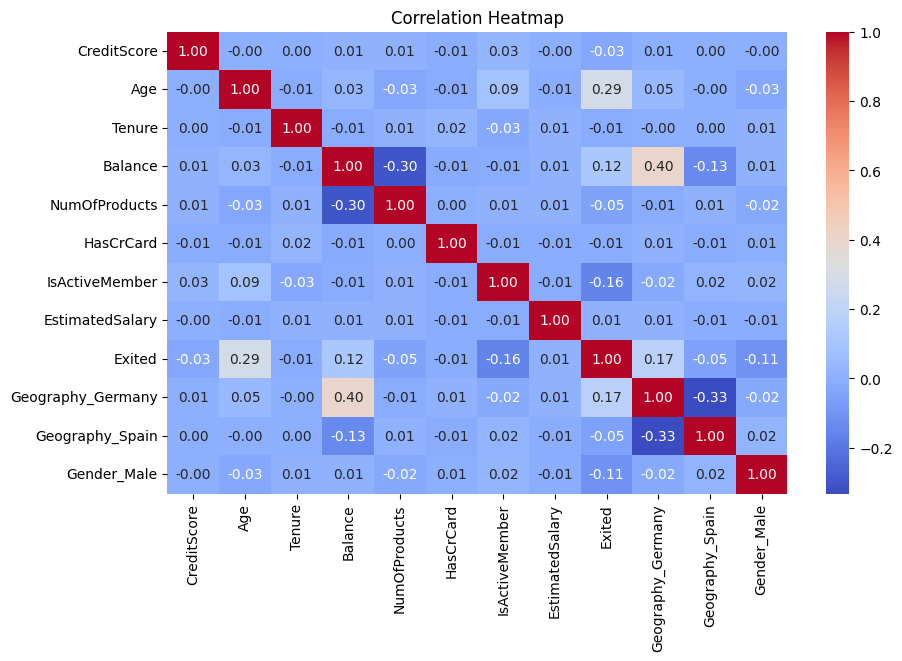

In [8]:
#Correlation Heatmap (Important Features)
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Step 5: Build and Evaluate the Churn Model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Confusion Matrix:
[[1548   59]
 [ 208  185]]
ROC-AUC Score: 0.8645208383804316


<ipython-input-10-0e554223d054>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


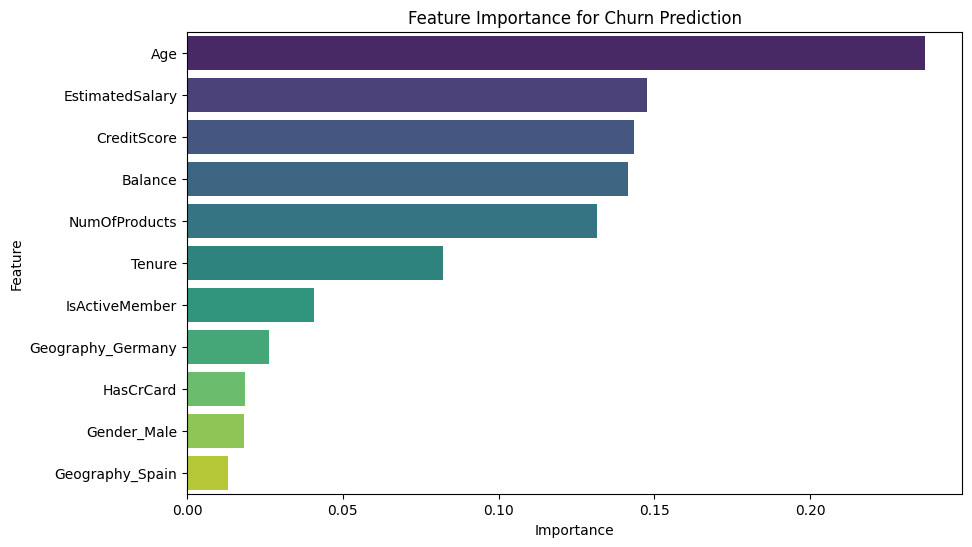

In [10]:
# Step 6: Feature Importance


importances = rf_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Final Project: Sterling Bank Nigeria PLC Branch Assessment
Name: Abdullahi Mohamed Jibril
Course: MS Data Analytics
University: Nexford University
Date Submitted: 03-22-2025


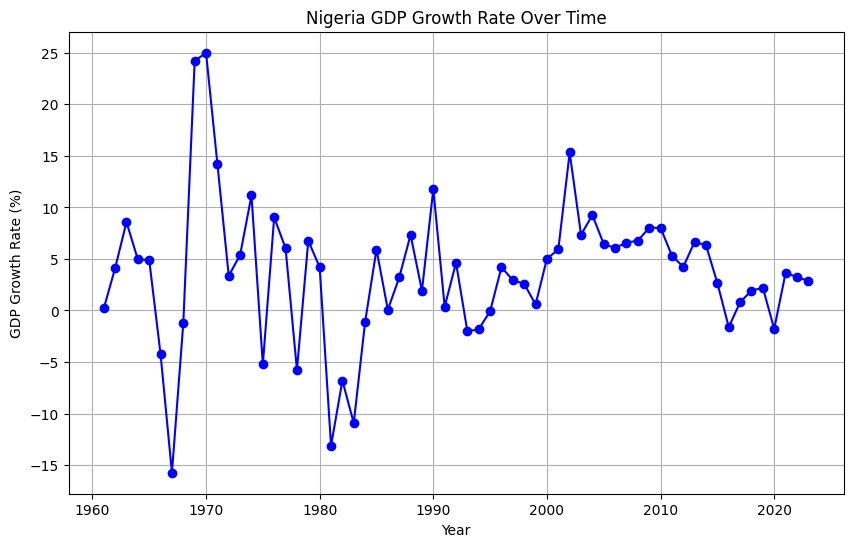

In [11]:
# Step 1: Load World Bank GDP Data# Display Project Information
print("=" * 60)
print("Final Project: Sterling Bank Nigeria PLC Branch Assessment")
print("=" * 60)
print(f"Name: Abdullahi Mohamed Jibril")
print(f"Course: MS Data Analytics")
print(f"University: Nexford University")
print(f"Date Submitted: 03-22-2025")
print("=" * 60)
gdp_data = pd.read_csv('API_NGA_DS2_en_csv_v2_445.csv', skiprows=4)

# Step 2: Filter for GDP Growth Rate
gdp_growth = gdp_data[gdp_data['Indicator Name'] == 'GDP growth (annual %)']
gdp_growth = gdp_growth.iloc[:, 4:-1].transpose()
gdp_growth.columns = ['GDP Growth Rate']
gdp_growth.index = pd.to_datetime(gdp_growth.index)

# Step 3: Plot GDP Growth Rate Over Time
plt.figure(figsize=(10, 6))
plt.plot(gdp_growth.index, gdp_growth['GDP Growth Rate'], marker='o', color='b')
plt.title('Nigeria GDP Growth Rate Over Time')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.grid(True)
plt.savefig('gdp_growth_rate.png', bbox_inches='tight')
plt.show()

In [13]:
# Display Project Information
print("=" * 60)
print("Final Project: Sterling Bank Nigeria PLC Branch Assessment")
print("=" * 60)
print(f"Name: Abdullahi Mohamed Jibril")
print(f"Course: MS Data Analytics")
print(f"University: Nexford University")
print(f"Date Submitted: 03-22-2025")
print("=" * 60)

Final Project: Sterling Bank Nigeria PLC Branch Assessment
Name: Abdullahi Mohamed Jibril
Course: MS Data Analytics
University: Nexford University
Date Submitted: 03-22-2025
